# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
#Using read_html for practice.
mars_tables = pd.read_html(url)
mars_df = mars_tables[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:

# Find the table
table = soup.find('table')

# Scrape the headers
headers = [header.text for header in table.find_all('th')]

# Scrape the data rows
data = []
rows = table.find_all('tr')[1:]  # Skip the header row

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all(['th', 'td'])
    row_data = [cell.text for cell in cells]

    data.append(row_data)

for row in data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure" ]
df = pd.DataFrame(data, columns=column_names)


In [9]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
df = df.astype({
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int32',
    'ls': 'int32',
    'month': 'int32',
    'min_temp': 'float64',
    'pressure': 'float64'
})


In [12]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
unique_month = df['month'].unique()
number_of_month = len(unique_month)
print(f"Number of months on Mars is {number_of_month}")

Number of months on Mars is 12


In [14]:
# 2. How many sols (Martian days) worth of data are there?
unique_sol = df['sol'].unique()
number_of_sol = len(unique_sol)
print(f"Number of sols in the data set on Mars is {number_of_sol}")

Number of sols in the data set on Mars is 1867


In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Convert the result to a DataFrame
avg_min_temp_df = avg_min_temp.reset_index()

# Rename the columns
avg_min_temp_df.columns = ['Month', 'Average Min Temperature']

# Display the DataFrame
avg_min_temp_df.head()


,Month,Average Min Temperature
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725


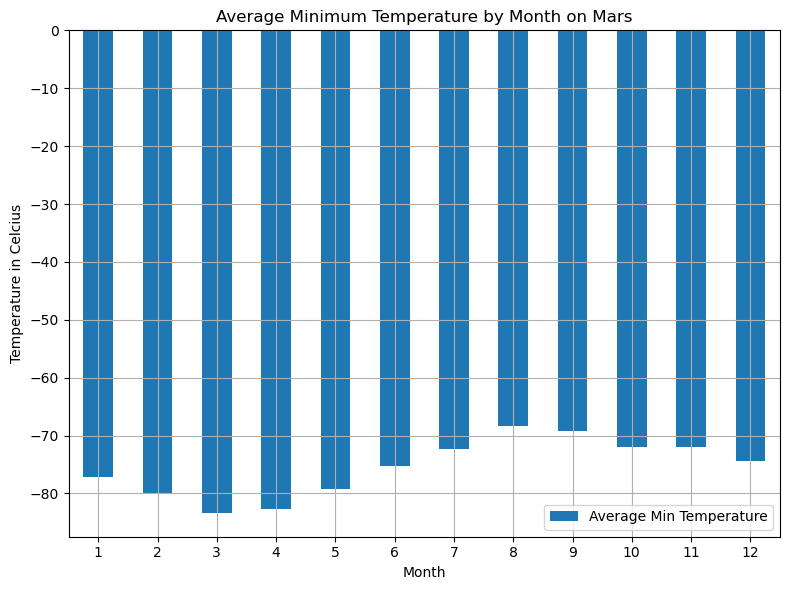

In [16]:
# Plot the average minimum temperature by month
avg_min_temp_df.plot(x='Month', y='Average Min Temperature', kind='bar', figsize=(8, 6))
# Titles and labels
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.xticks(rotation=0)


# Adjust layout and show
plt.tight_layout()
plt.grid()
plt.savefig('Output_Images/Avg_Min_Temp_Mars.jpg', format='jpeg')
plt.show()


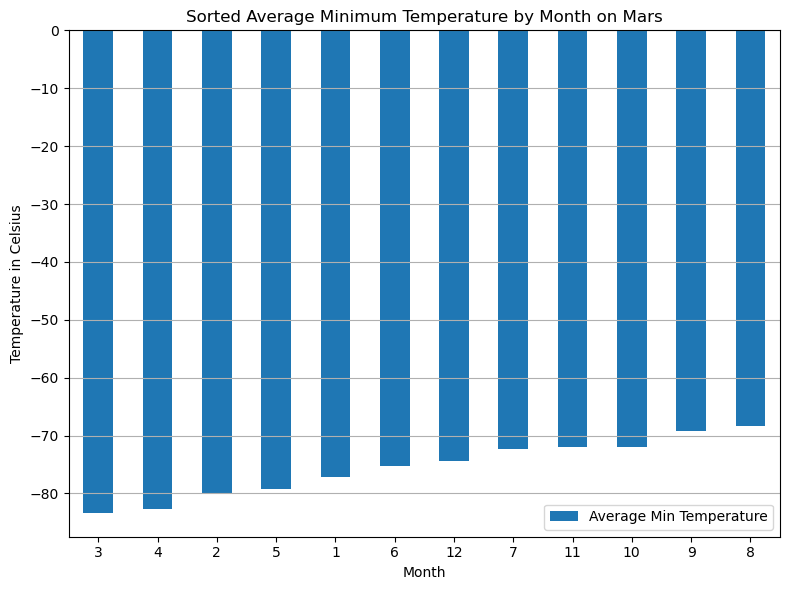

Coldest month on Mars is month number 3.0. The temperature reaches -83.31
Hottest month on Mars is month number 8.0. The temperature reaches -68.38


In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp_df = avg_min_temp_df.sort_values(by='Average Min Temperature')
sorted_avg_min_temp_df.plot( x='Month', y='Average Min Temperature', kind='bar', figsize=(8, 6))
# Titles and labels
plt.title('Sorted Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
# Adjust layout and show
plt.tight_layout()
plt.grid(axis='y')
plt.savefig('Output_Images/Sorted_Avg_Min_Temp_Mars.jpg', format='png')
plt.show()

#Calculate and print coldest month on Mars.
coldest_month = sorted_avg_min_temp_df.iloc[0]['Month']
coldest_temp = sorted_avg_min_temp_df.iloc[0]['Average Min Temperature']
print(f"Coldest month on Mars is month number {coldest_month}. The temperature reaches {coldest_temp:.2f}")

#Calculate and print hottest month on Mars.
hottest_month = sorted_avg_min_temp_df.iloc[-1]['Month']
hottest_temp = sorted_avg_min_temp_df.iloc[-1]['Average Min Temperature']
print(f"Hottest month on Mars is month number {hottest_month}. The temperature reaches {hottest_temp:.2f}")


In [18]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()

#Convert the results to a DataFrame
avg_pressure_df = avg_pressure.reset_index()

#Rename the columns
avg_pressure_df.columns = ['Month', 'Average Pressure']

#Display the data frame
avg_pressure_df.head()

,Month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047


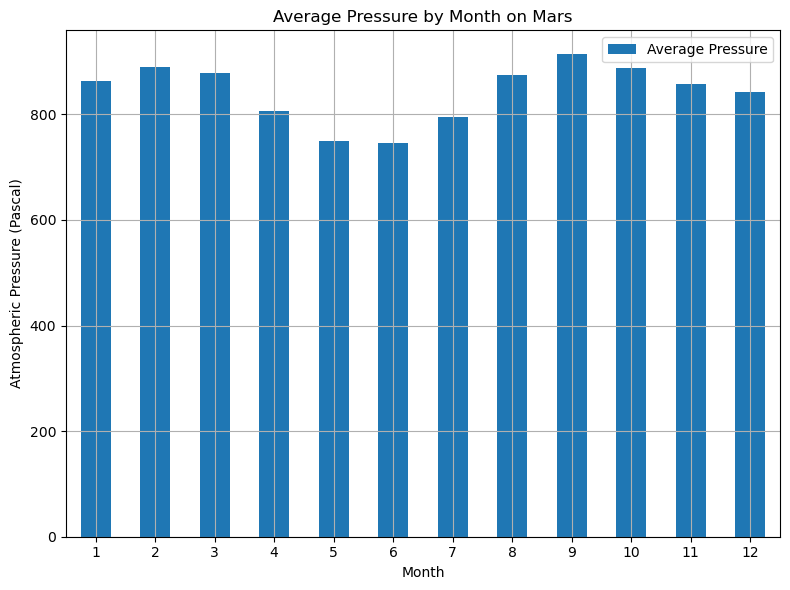

In [19]:
# Plot the average pressure by month
avg_pressure_df.plot(x='Month', y='Average Pressure', kind='bar', figsize=(8, 6))

# Titles and labels
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (Pascal)')
plt.xticks(rotation=0)

# Adjust layout and show
plt.tight_layout()
plt.grid()
plt.savefig('Output_Images/Avg_Pressure_Mars.jpg', format='jpeg')
plt.show()



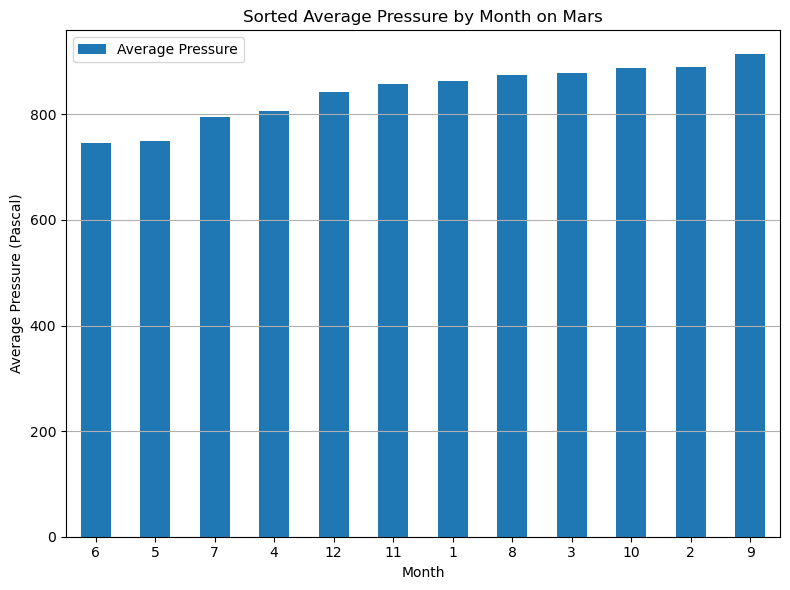

Month when the pressure is lowest on Mars is 6.0. The pressure reaches 745.0544217687075
Month when the pressure is highest on Mars is 9.0. The pressure reaches 913.3059701492538


In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_df = avg_pressure_df.sort_values(by='Average Pressure')
sorted_avg_pressure_df.plot(x='Month', y='Average Pressure', kind='bar', figsize=(8, 6))

# Titles and labels
plt.title('Sorted Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pascal)')
plt.xticks(rotation=0)
# Adjust layout and show
plt.tight_layout()
plt.grid(axis='y')
plt.savefig('Output_Images/Sorted_Avg_Pressure_Mars.jpg', format='jpeg')
plt.show()

#Calculate and print lowest pressure on Mars and month
lowest_pressure_month = sorted_avg_pressure_df.iloc[0]['Month']
lowest_pressure = sorted_avg_pressure_df.iloc[0]['Average Pressure']
print(f"Month when the pressure is lowest on Mars is {lowest_pressure_month}. The pressure reaches {lowest_pressure}")

#Calculate and print highest pressure on Mars and month
highest_pressure_month = sorted_avg_pressure_df.iloc[-1]['Month']
highest_pressure = sorted_avg_pressure_df.iloc[-1]['Average Pressure']
print(f"Month when the pressure is highest on Mars is {highest_pressure_month}. The pressure reaches {highest_pressure}")

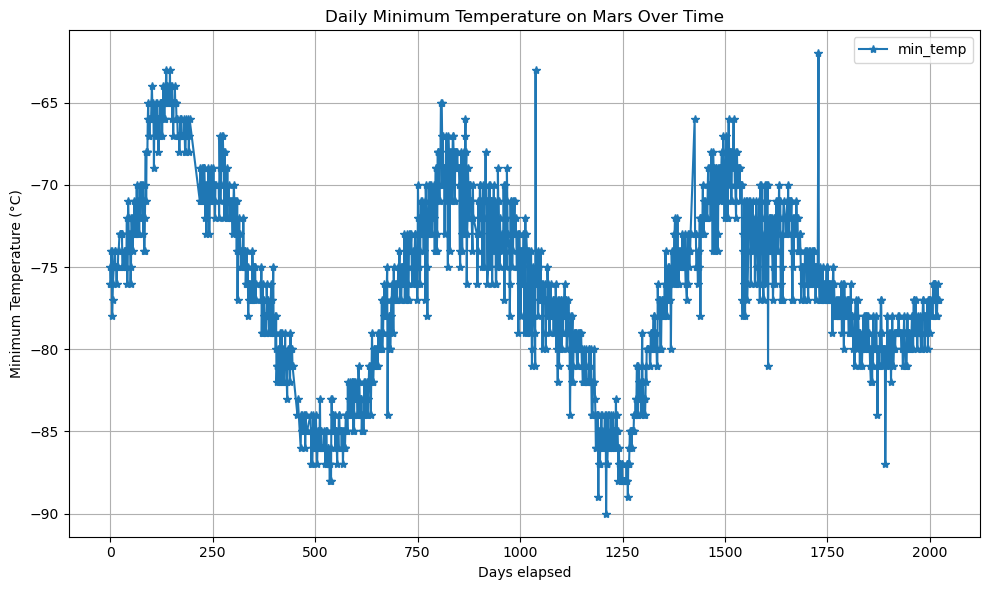

By observing this graph and comparing dates with minimum and maximum temperatures, I estimate Martian year to be a little less then 700 terrestial days.


In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Convert the 'terrestrial_date' column to datetime format
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
#Calculate number of days elapsed
df['days_elapsed'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature over time
df.plot(x='days_elapsed', y='min_temp', marker='*', linestyle='-', figsize=(10, 6))

# Add titles and labels
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Days elapsed')
plt.ylabel('Minimum Temperature (°C)')
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('Output_Images/Daily_Min_Temp_Mars.jpg', format='jpeg')
plt.show()

print("By observing this graph and comparing dates with minimum and maximum temperatures, I estimate Martian year to be a little less then 700 terrestial days.")




### Data analysis of Mars Data

1. There are 12 month on Mars
2. Number of Sols in the data set on Mars is 1867
3. Coldest month on Mars is month number 3. The temperature reaches -83.31 C
   Warmest month on Mars is month number 8. The temperature reaches -68.38 C
4. By observing this graph and comparing dates with minimum and maximum temperatures, I estimate Martian year to be a little less then 700  terrestial days.
5. Atmospheric Pressure:
   Month when the pressure is lowest on Mars is 6. The pressure reaches 745.05 Pascal
   Month when the pressure is highest on Mars is 9. The pressure reaches 913.30 Pascal

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
df.to_csv('mars_data', index=False)


In [23]:
browser.quit()